<a href="https://colab.research.google.com/github/Kraykray69/Keras-model-for-Fashion-MNIST-Dataset/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach for Problem Statement
* Load the data & libraries
* Declare the model
    * Sequential Sequence of Layers
    * Functional Multi Model/Transfer Learning
* Declare the Layers
    * Dense, Dropout
    * Number of Neurons, Act Function
* Compile the Model
    * Optimize(SGD, Adam)
    * Loss Function(Cross Entropy, MSE, RMSE)
    * Metrics(Accuracy, F1, Precision, Recall)
* Fit the Model
    * Pass X train and Y train
    * Pass X test and Y test
    * Epochs
    * Batch Size
* Predict and Evaluate the Model

In [1]:
!unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


# Load the libraries ad data

Load the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load the data

In [3]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


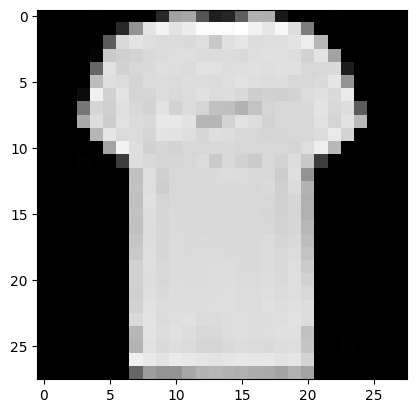

In [6]:
features = ['pixel{}'.format(pixel_num) for pixel_num in range(1,785)]
row_to_examine = 10
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(),(28,28))
plt.imshow(image_data, cmap='gray')

# Divide into x & y

In [7]:
x = train.drop('label',axis=1)
y = train['label']

In [8]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [11]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

One hot encode the output

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

# Declare the model and layers

In [14]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,))) #Layer 1 and input layer
model.add(Dropout(0.2)) #Dropout layer
model.add(Dense(256,activation='relu')) #Layer 2
model.add(Dropout(0.2)) #Dropout layer
model.add(Dense(256,activation='relu')) #Layer 3
model.add(Dropout(0.2)) #Dropout layer
model.add(Dense(10,activation='softmax')) #Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

# Model compilation

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fitting the model

In [17]:
hist = model.fit(x_train,y_train_ohe,batch_size=128,epochs=100,validation_data=(x_test,y_test_ohe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5578 - loss: 12.1481 - val_accuracy: 0.7726 - val_loss: 0.6806
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7144 - loss: 0.8543 - val_accuracy: 0.8062 - val_loss: 0.5665
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7662 - loss: 0.6698 - val_accuracy: 0.8273 - val_loss: 0.4894
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7852 - loss: 0.5963 - val_accuracy: 0.8248 - val_loss: 0.4690
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7991 - loss: 0.5489 - val_accuracy: 0.8397 - val_loss: 0.4737
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8052 - loss: 0.5369 - val_accuracy: 0.8376 - val_loss: 0.4366
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8148 - loss: 0.5089 - val_accuracy: 0.8330 - val_loss: 0.4544
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8159 - loss: 0.4970 

# Plotting the accuracy & loss

Accuracy plotting

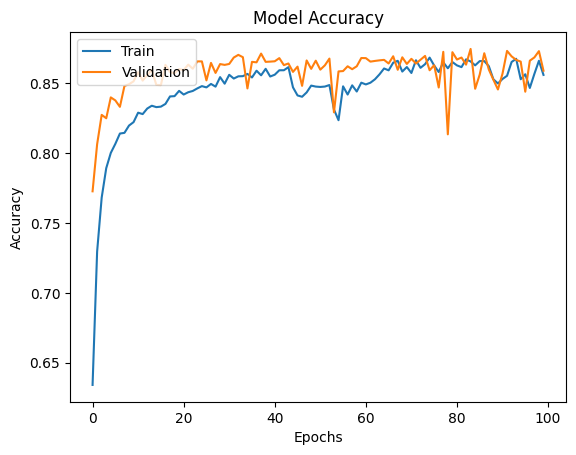

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper left')

Loss plotting

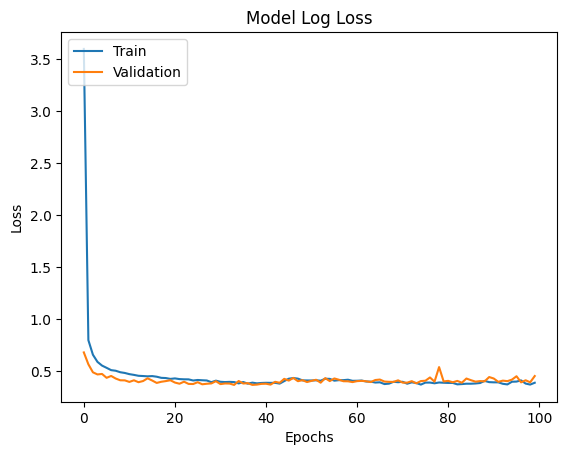

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Log Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper left')

In [20]:
y_hat_train_dense = model.predict(x_train)
y_hat_test_dense = model.predict(x_test)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
#We can't take confusion matrix with probabilities
#argmax converts the probabilities into constants
y_hat_train_dense = np.argmax(model.predict(x_train),axis=1)
y_hat_test_dense = np.argmax(model.predict(x_test),axis=1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Model evaluation

In [22]:
model_eval(y_train,y_hat_train_dense)
model_eval(y_test,y_hat_test_dense)

The accuracy of the model is: 0.88
[[4267    1   51  107   15    0  407    1   11    0]
 [   1 4690    1   51    2    0   12    0    2    0]
 [  32    0 3891   26  701    0  129    0    9    0]
 [  38    0   19 4454  248    0   92    0    0    0]
 [   1    0 1137   92 3468    0  150    0    2    0]
 [   0    0    0    0    0 4760    0   15    0    1]
 [ 625    1  688   74  604    0 2779    0   21    0]
 [   0    0    0    0    0    1    0 4734    0   38]
 [   1    0   31    7   23    3   35    2 4673    1]
 [   0    0    0    0    0    6    0  112    2 4655]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4860
           1       1.00      0.99      0.99      4759
           2       0.67      0.81      0.73      4788
           3       0.93      0.92      0.92      4851
           4       0.69      0.72      0.70      4850
           5       1.00      1.00      1.00      4776
           6       0.77      0.58      0.66      4792
 